<a href="https://colab.research.google.com/github/NadaNamaniZitouni/House-price-prediction/blob/main/lab_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  The objective of this data preparation to clean up the data for future use to predict house pricings
## So to answer the problem detection, most likely this data preparation will be used in a case of regression modeling because we want an algorithm to yield some numeric value.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# this segment is reserved for usage on google colab
# it is used to be able to import the data
from google.colab import files
uploaded = files.upload()

Saving AgencyDataset.xlsx to AgencyDataset.xlsx


In [3]:
# Import the dataset
dataset = pd.read_excel("AgencyDataset.xlsx")
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [135]:
# we make a copy from the dataset 
df = dataset.copy()

## Dataset overview

In [136]:
# check the number of rows and columns of the dataset
df.shape

(4600, 18)

In [137]:
# Check for any null values in the dataset
df.isnull().values.any()

False

In [138]:
# Check for any missing data in the dataset
df.isna().sum() 

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [139]:
#Get information on the features of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   int64         
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [140]:
# Get a description of the various analytic options of the dataset
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


## Data value check


In [141]:
# Check the data types of the features
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
dtype: object

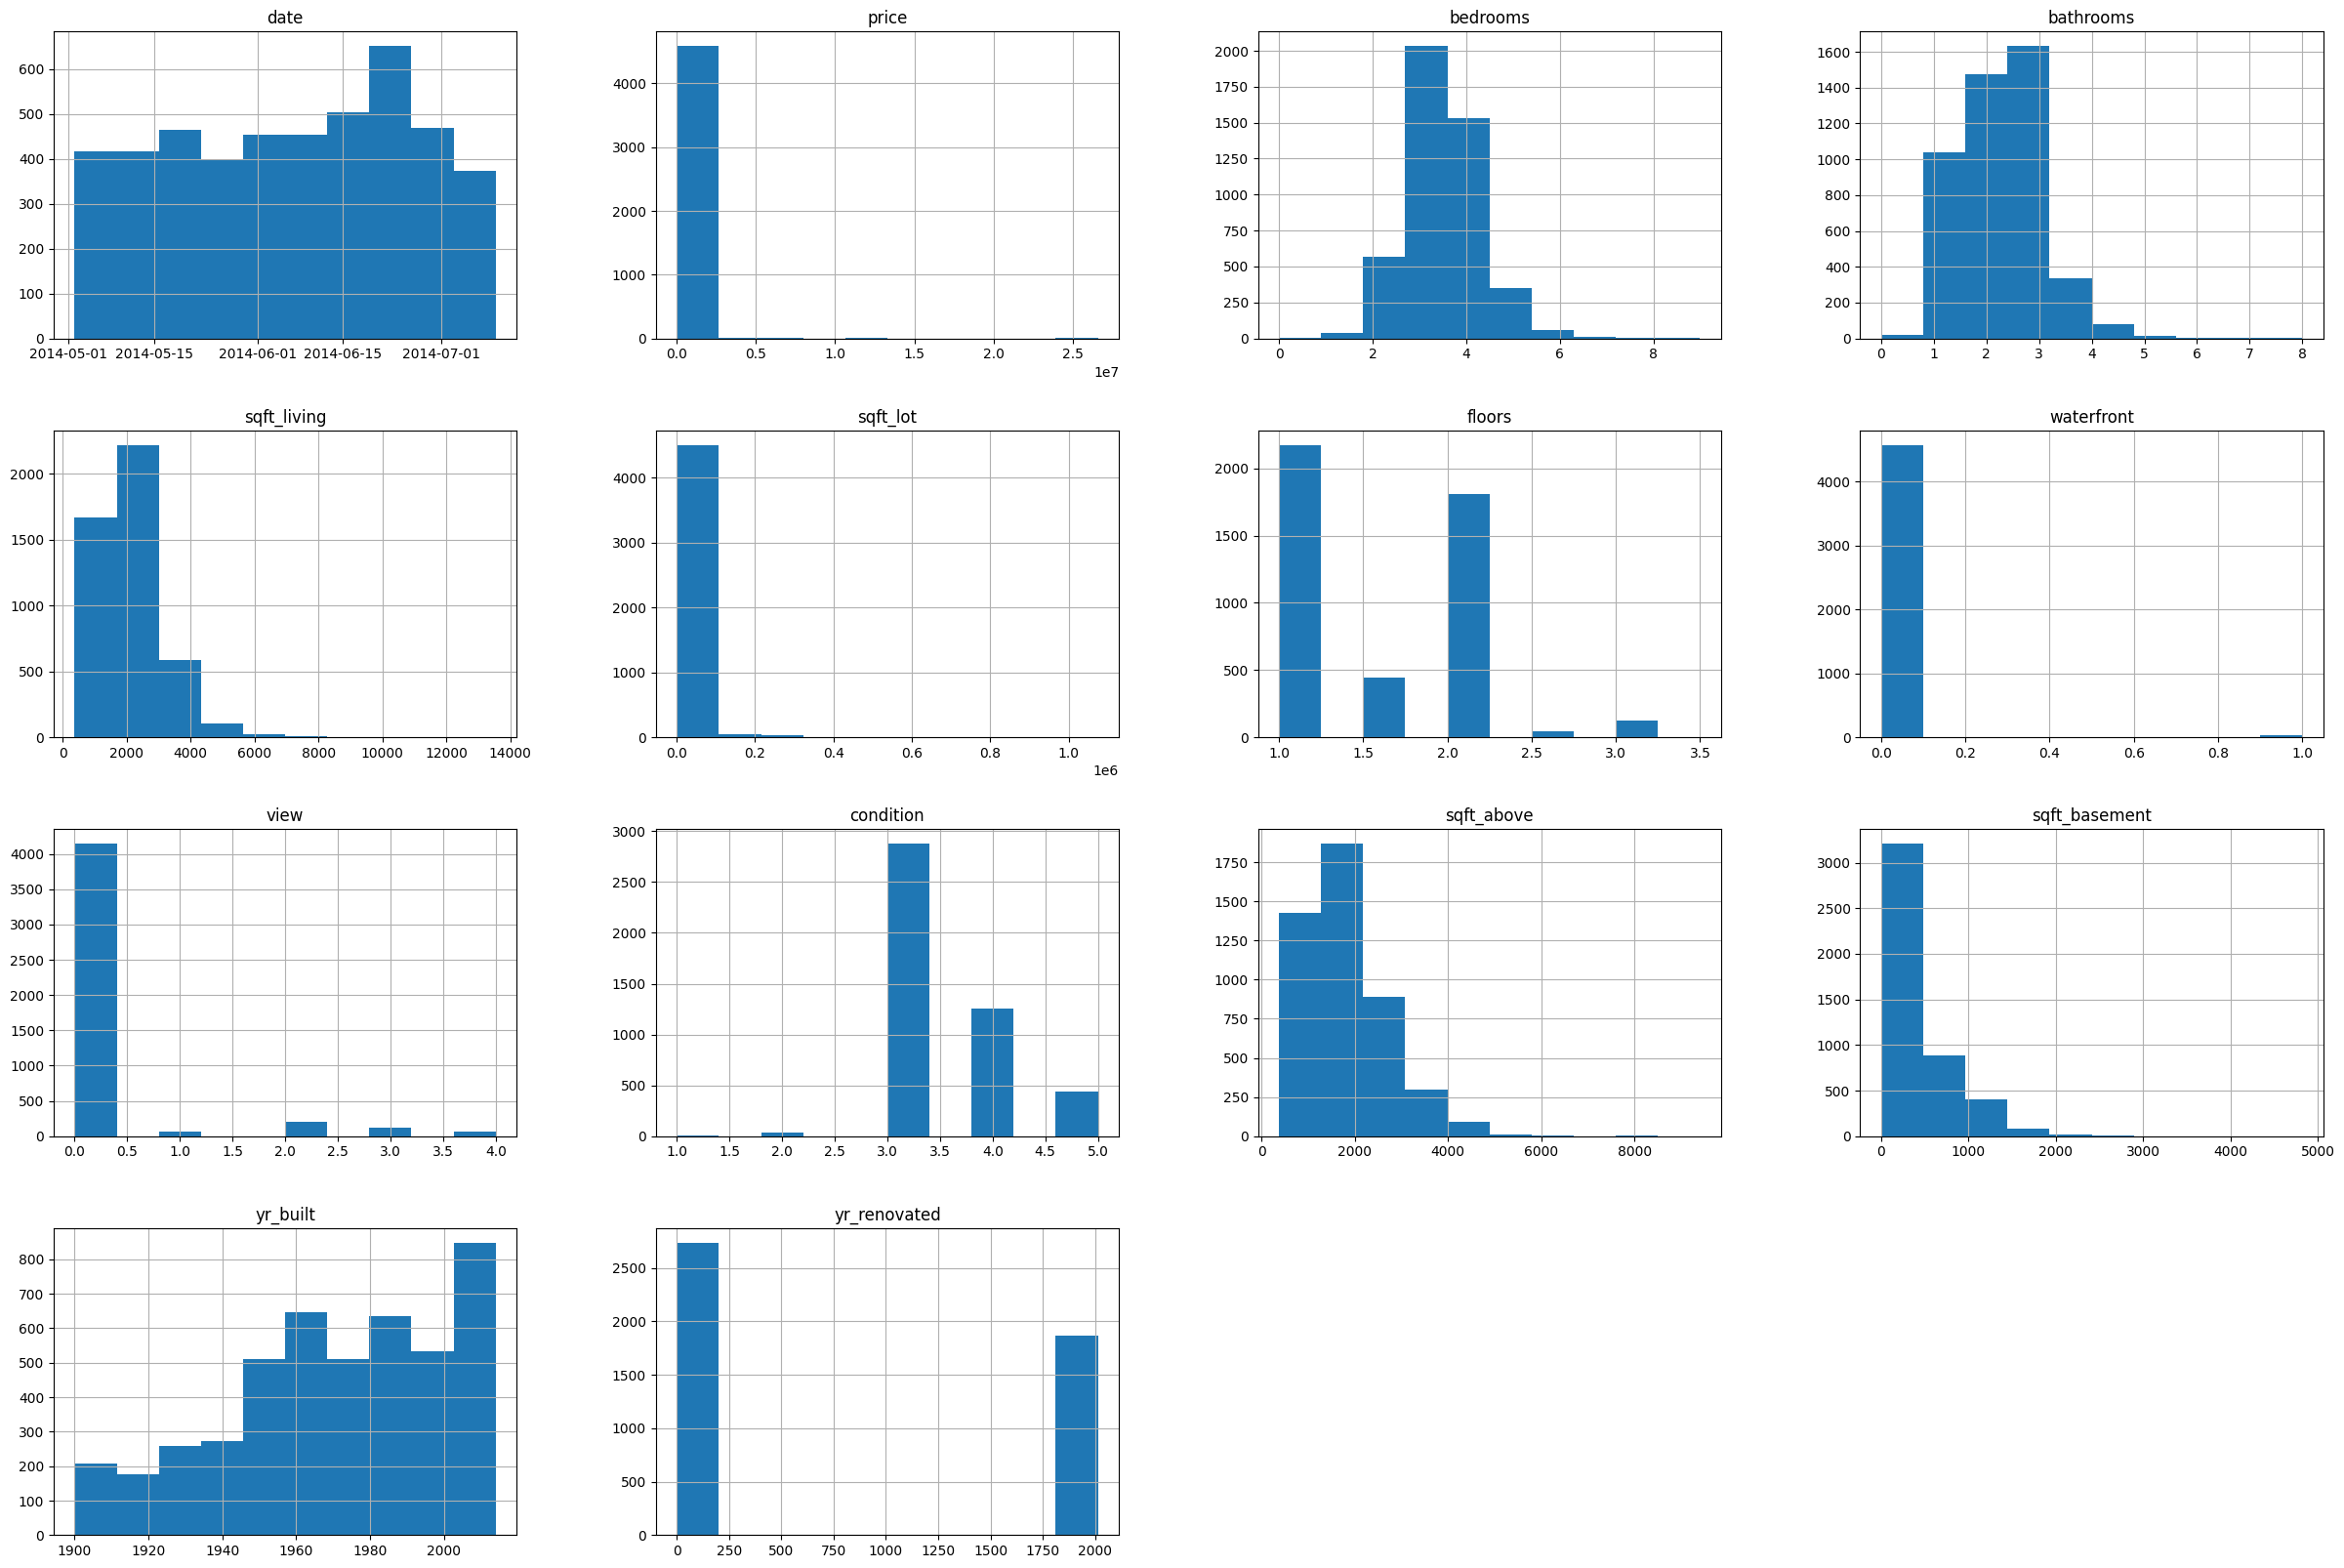

In [142]:
# We give a histogram of the values of the features of the dataset
df.hist(figsize=(30,20))
plt.show()

In [143]:
# We need to check the values of the features to get a more comprehensive idea of what they contain

for i in df.columns:
  print(df[i].value_counts())

2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2014-07-09    121
             ... 
2014-06-07      4
2014-07-06      3
2014-07-04      2
2014-05-11      2
2014-05-17      1
Name: date, Length: 70, dtype: int64
0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: price, Length: 1741, dtype: int64
3    2032
4    1531
2     566
5     353
6      61
1      38
7      14
8       2
0       2
9       1
Name: bedrooms, dtype: int64
2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.25      23
4.00      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
6.25       2
0.00       2
8.00       1
5.75       1
6.50       1
6.75       1
Name: bathrooms, dtype: int64
1940     32
1720     32
1660     31
1840     31
2000

In [144]:
# Almost immediately we can detect 2 features which are not needed, it is the date feature and it contains the date of when the 'house information' were added onto the dataset and the country feature which only contains the one value 'USA'
# We do not need this information and this will be illustrated as we go
# We will drop these feature
df.drop(columns=df.columns[0], 
        axis=1, 
        inplace=True)
df.drop(columns=df.columns[-1], 
        axis=1, 
        inplace=True)

In [145]:
# let's check the different values of bathroom
df['bathrooms'].value_counts()

2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.25      23
4.00      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
6.25       2
0.00       2
8.00       1
5.75       1
6.50       1
6.75       1
Name: bathrooms, dtype: int64

In [146]:
# We notice that there's a numbers in the columns 'bathrooms' and 'floors' indicating a float numbers. Let's turn them on integers.
# we will round up the values to create more comprehensible values
df['bathrooms'] = np.round(df['bathrooms'])
df['floors'] = np.round(df['floors'])

In [147]:
df['bathrooms'].value_counts()

2.0    2955
1.0     763
3.0     579
4.0     274
5.0      17
6.0       8
0.0       2
8.0       1
7.0       1
Name: bathrooms, dtype: int64

In [148]:
# check the new shape of the data
df.shape

(4600, 16)

##Price: the output variable dissection

In [149]:
# we are checking for any values of 0 in price
(df['price']==0).sum(0)

49

In [150]:
# as several 0 have been found in price let's change them into missing values
df['price'].replace(0, np.nan, inplace=True)

In [151]:
df.isnull().sum()


price            49
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
dtype: int64

In [152]:
# we will then change the 0 values of the price into mean of the feature

df['price'].fillna(value=df['price'].mean(), inplace=True)
df.isnull().sum().sum()

0

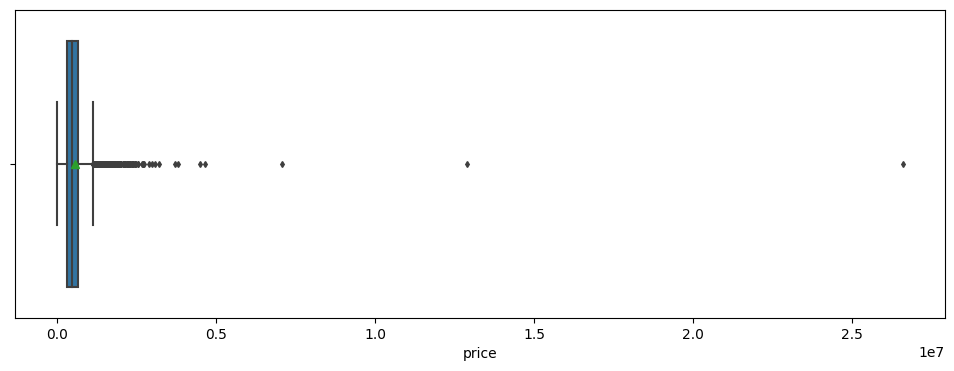

In [153]:
# We will then display the distribution of the target column (price) using a boxplot.

fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', data = df, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()

From the boxplot there seems to be a lot of outliers at the top of the distribution, and it is especially visible that the right whisker is slightly longer than the left whisker and that the median line is gravitating towards the left of the box. The distribution is therefore slightly skewed to the right.

Let's take a deeper look into the correlations between variable to check if we can have any information of what might influence our target variable

In [154]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
dtype: object

We will first check with the continuous data and then check the categorical data

** continuous data: we can use Pearson's coefficient r to measures the strength and direction of the relationship

(Pearson's coefficient r: The Pearson correlation coefficient, often referred to as Pearsons r, is a measure of linear correlation between two variables. This means that the Pearson correlation coefficient measures a normalized measurement of covariance)

In [155]:
# We will display the correlation frame to take a primary look at the situation of the data
df.corr()

<ipython-input-155-c5c0d63b5ead>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.208126,0.324359,0.439775,0.051186,0.146399,0.143140,0.237252,0.038566,0.375239,0.215616,0.021661,-0.028879
bedrooms,0.208126,1.000000,0.512372,0.594884,0.068819,0.172614,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.324359,0.512372,1.000000,0.706933,0.109094,0.308094,0.075862,0.223431,-0.059901,0.601661,0.349443,0.338821,-0.156332
sqft_living,0.439775,0.594884,0.706933,1.000000,0.210538,0.312837,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.051186,0.068819,0.109094,0.210538,1.000000,0.013178,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.146399,0.172614,0.308094,0.312837,0.013178,1.000000,0.026344,0.036615,-0.229310,0.483293,-0.248533,0.356836,-0.208393
waterfront,0.143140,-0.003483,0.075862,0.117616,0.017241,0.026344,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.237252,0.111028,0.223431,0.311009,0.073907,0.036615,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.038566,0.025080,-0.059901,-0.062826,0.000558,-0.229310,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.375239,0.484705,0.601661,0.876443,0.216455,0.483293,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


In [156]:
# Getting the Pearson Correlation Coefficient between the features and the target
correlation = df.corr()

dfX = df.loc[ : , df.columns != 'price']
column_names = list(dfX.columns)

for i in dfX.columns:
  if df[i].dtypes != 'O':
    print(i, correlation.loc[i, 'price'])

bedrooms 0.2081261184418628
bathrooms 0.3243589387579666
sqft_living 0.4397754901908262
sqft_lot 0.05118640895582611
floors 0.14639886838078314
waterfront 0.14314006486939113
view 0.2372519673907032
condition 0.038565743719023625
sqft_above 0.3752390608821429
sqft_basement 0.21561579258280417
yr_built 0.02166113986739118
yr_renovated -0.028878856334512825


<ipython-input-156-d3df9fd4b45f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


the lowest values of correlation can be seen in sqrt_lot, condition and yr_renovated

The Pearson Correlation Coefficient of price and bedrooms is 0.20812611844186266  with a P-value of P = 3.4399216848526177e-46
The Pearson Correlation Coefficient of price and bathrooms is 0.324358938757967  with a P-value of P = 3.6905657938744226e-113
The Pearson Correlation Coefficient of price and sqft_living is 0.4397754901908281  with a P-value of P = 6.779200236426025e-217
The Pearson Correlation Coefficient of price and sqft_lot is 0.051186408955826046  with a P-value of P = 0.0005147438546890692
The Pearson Correlation Coefficient of price and floors is 0.14639886838078364  with a P-value of P = 1.8577011922313233e-23
The Pearson Correlation Coefficient of price and waterfront is 0.14314006486939096  with a P-value of P = 1.7410457270713443e-22
The Pearson Correlation Coefficient of price and view is 0.2372519673907023  with a P-value of P = 7.067849878861739e-60
The Pearson Correlation Coefficient of price and condition is 0.03856574371902377  with a P-value of P = 0.00889878

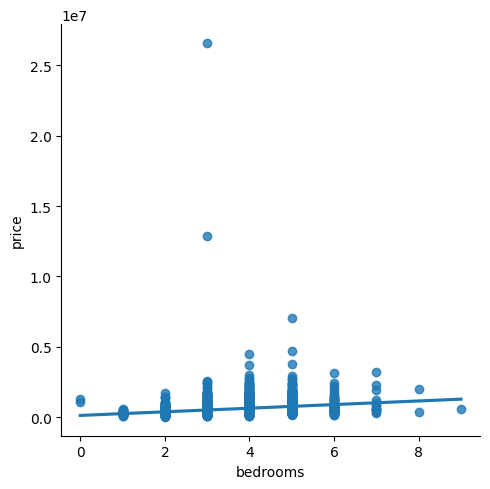

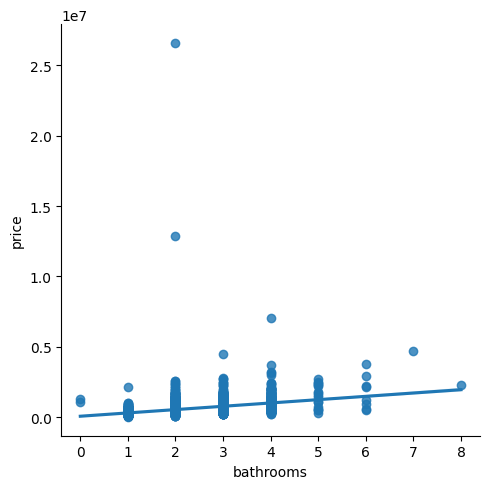

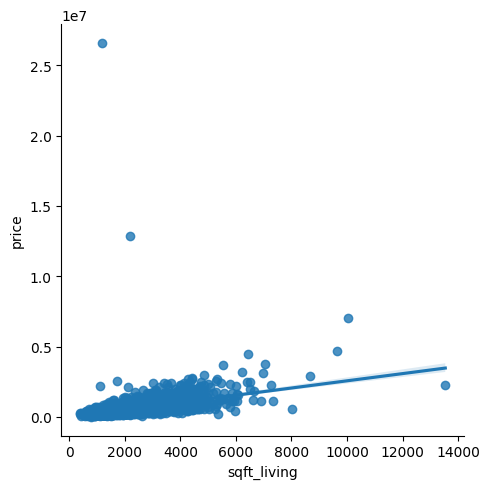

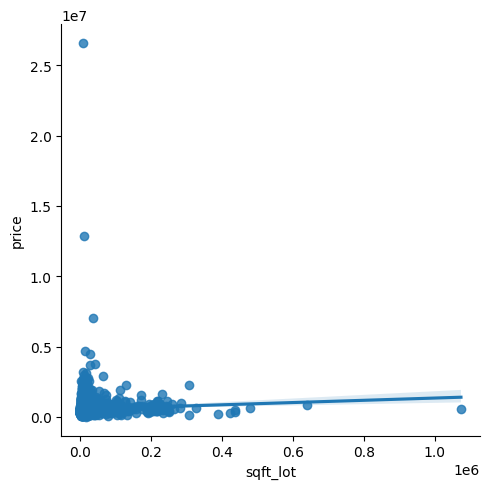

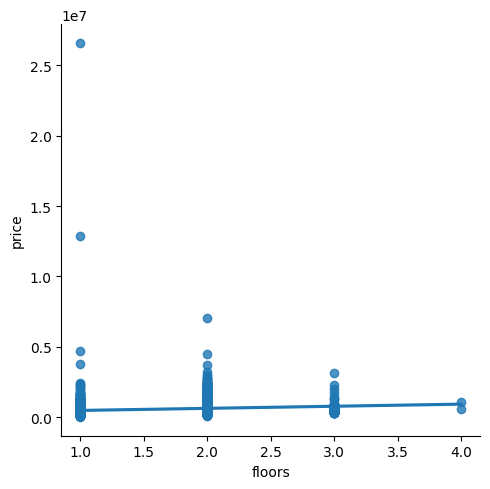

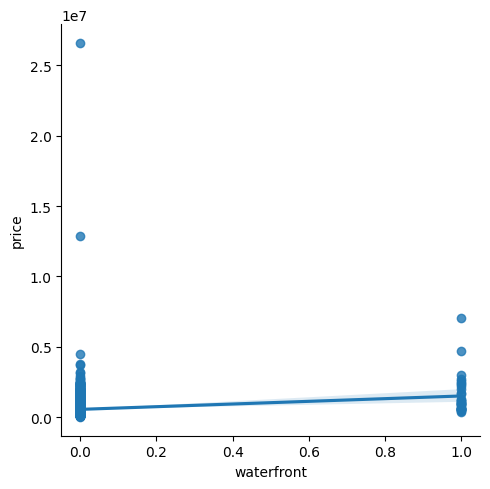

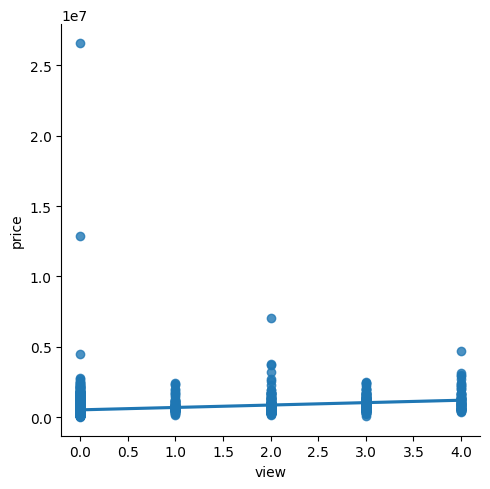

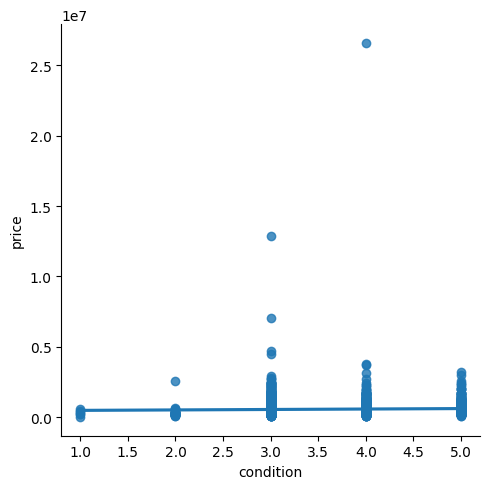

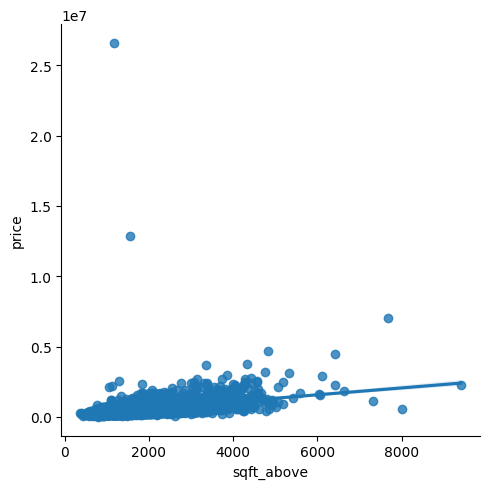

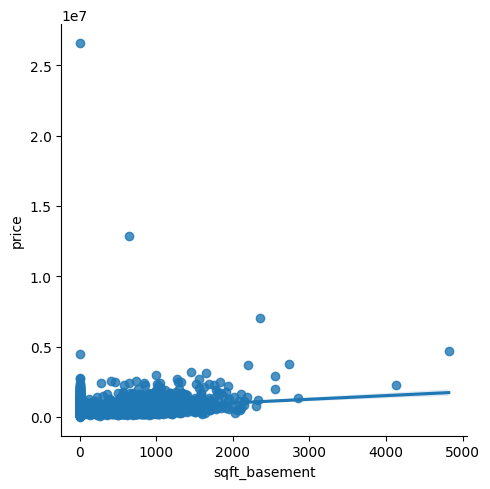

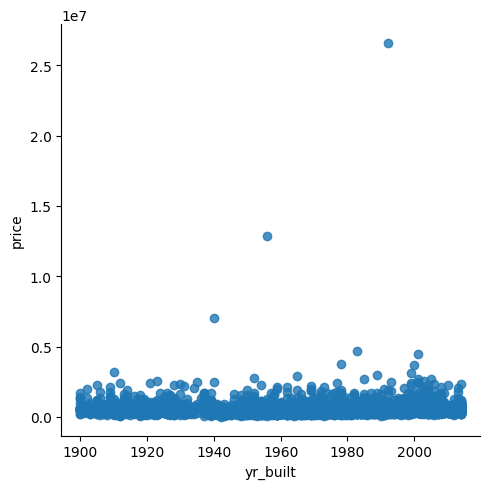

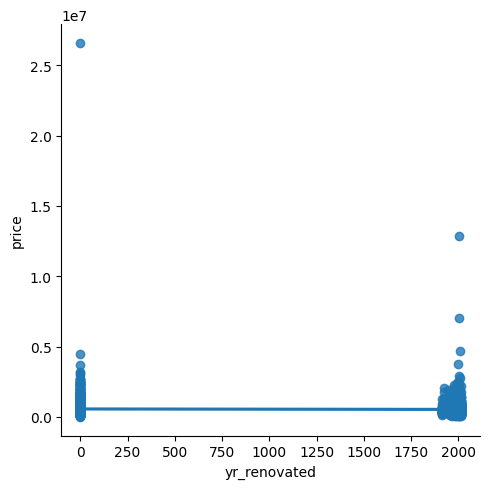

In [157]:
# getting prson's coefficient and p-value for the continuous data
from scipy import stats

dfX = df.loc[ : , df.columns != 'price']
column_names = list(dfX.columns)
for i in column_names:
  if df[i].dtypes != 'O':
    pearson_coef, p_value = stats.pearsonr(df[i], df['price'])
    print("The Pearson Correlation Coefficient of price and", i , 'is', pearson_coef, " with a P-value of P =", p_value)
    sns.lmplot(x=i, y="price", data=df)

- From the graphs, we can detect that most features have a positive correlation with the price
- But we can also detect that for both the year renovated and sqft basement features are mostly leaning towards 0
- we can also detect that the yr_built dots are tightly packed

- We can detect that for both sqft_basement and renovated, half of the values are at 0
- It might be more interesting for our analysis to classify basement and renovation as dichotomous variables (e.g., 0 for no basement, 1 for basement present). Let's create two new columns in our dataset.

In [158]:
df['sqft_basement'].value_counts()

0       2745
500       53
600       45
800       43
900       41
        ... 
2300       1
265        1
1610       1
862        1
1640       1
Name: sqft_basement, Length: 207, dtype: int64

In [159]:
df['yr_renovated'].value_counts()

0       2735
2000     170
2003     151
2009     109
2001     109
2005      95
2004      77
2014      72
2006      68
2013      61
1923      57
1994      57
1989      55
2011      54
2012      45
2008      45
1988      43
1999      41
2002      41
1983      41
1998      40
1993      39
1912      33
1979      32
1992      32
2010      30
1985      29
1997      28
1996      22
1982      22
1972      17
1990      16
1956      15
1963      12
1969      11
1984      10
1970       9
1968       9
1954       8
1945       7
2007       7
1974       6
1934       6
1971       5
1958       5
1986       5
1978       3
1980       2
1995       2
1955       2
1977       1
1913       1
1991       1
1948       1
1966       1
1960       1
1987       1
1953       1
1981       1
1975       1
Name: yr_renovated, dtype: int64

In [160]:
# let's create our 2 new features and tuen them into category types to make the sumerization of the variable easier to do
df['basement_present'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df['basement_present'] = df['basement_present'].astype('category')

df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df['renovated'] = df['renovated'].astype('category')

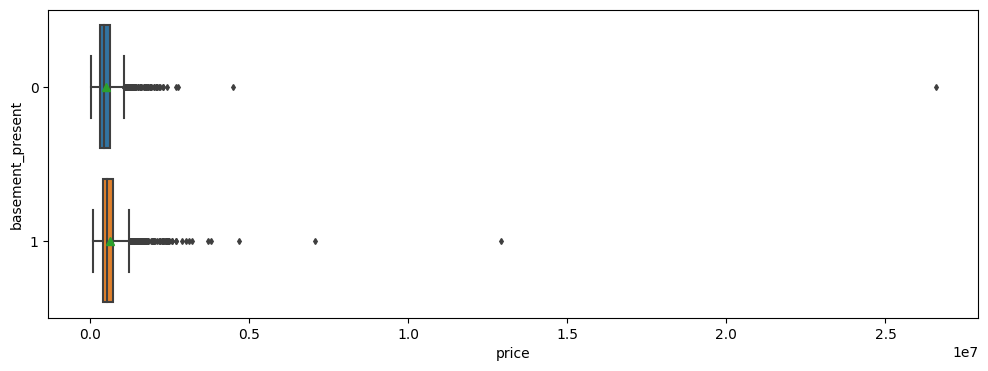

point biserial correlation r between price and basement_present is 0.11226974631593502 with p = 2.2305279470989873e-14



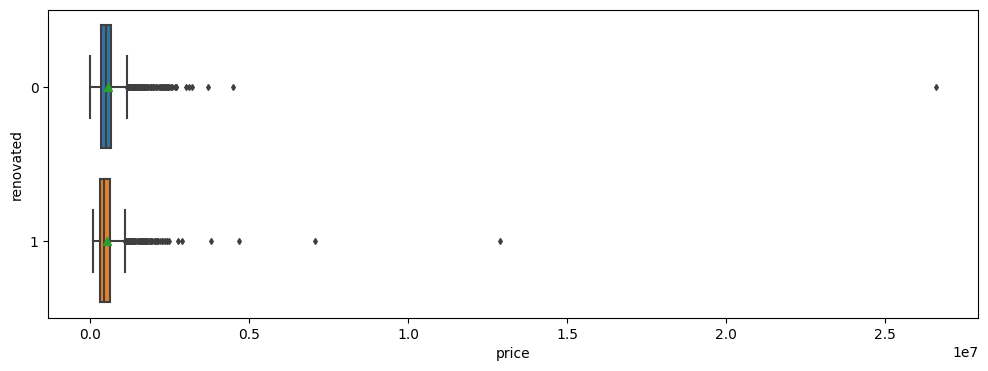

point biserial correlation r between price and renovated is -0.02868457152138387 with p = 0.05173240751589443


In [161]:
# basement_present variable
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'basement_present', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
plt.show()
r, p = stats.pointbiserialr(df['basement_present'], df['price'])
print ('point biserial correlation r between price and basement_present is %s with p = %s' %(r,p))

# renovated variable
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'renovated', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
print ('')
plt.show()
r, p = stats.pointbiserialr(df['renovated'], df['price'])
print ('point biserial correlation r between price and renovated is %s with p = %s' %(r,p))

We will take a deeper look into the correlation between the three most identical features

In [162]:
# check the correlation between  sqft_ above and sqft living
data = df[['sqft_above','sqft_living']]
correlation = data.corr(method='pearson')
correlation

,sqft_above,sqft_living
sqft_above,1.000000,0.876443
sqft_living,0.876443,1.000000


In [163]:
# check the correlation between  sqft_ above and sqft_lot
data = df[['sqft_above','sqft_lot']]
correlation = data.corr(method='pearson')
correlation

,sqft_above,sqft_lot
sqft_above,1.000000,0.216455
sqft_lot,0.216455,1.000000


In [164]:
# check the correlation between  sqft_ above and sqft_lot
data = df[['sqft_living','sqft_lot']]
correlation = data.corr(method='pearson')
correlation

,sqft_living,sqft_lot
sqft_living,1.000000,0.210538
sqft_lot,0.210538,1.000000


In [165]:
# check the correlation between the price and sqft_lot
data = df[['price','sqft_lot']]
correlation = data.corr(method='pearson')
correlation

,price,sqft_lot
price,1.000000,0.051186
sqft_lot,0.051186,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=colo

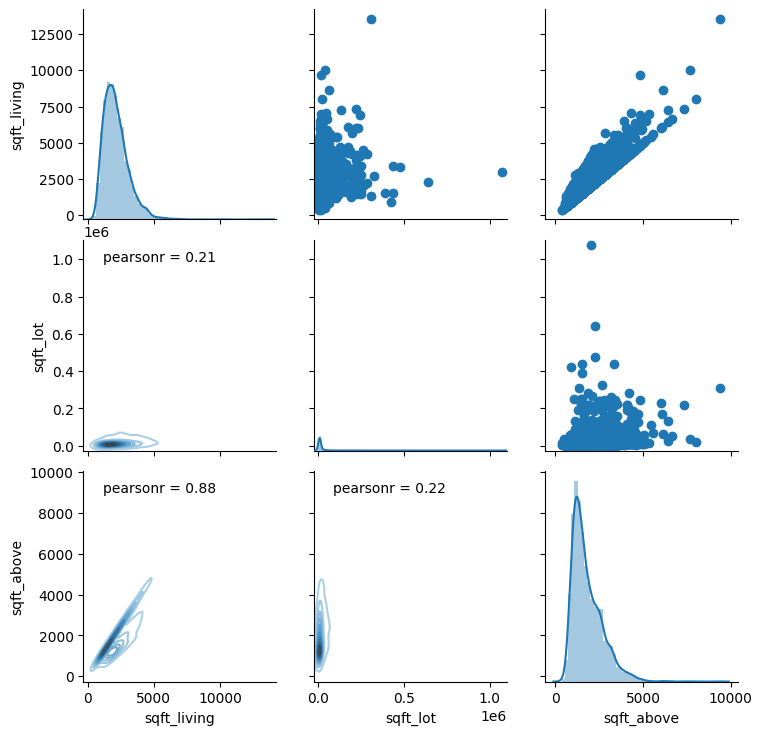

In [166]:
# define a function to display pearson coefficients on the lower graphs 
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("pearsonr = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.PairGrid(data=df, vars = ['sqft_living', 'sqft_lot', 'sqft_above']) # define the pairgrid
g.map_upper(plt.scatter) 
g.map_diag(sns.distplot)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)
plt.show()

- we can see here that there is a high correlation between between sqft_above and sqft_living but a  negligeable correlation with sqft_lot
- it is also visible from the r value with the variable price that the sqft_lot is a feature with low correlation towards our need and thus can be dropped

- we will check the ordinal features 
and as the 2 new features are ordinal as well, we will take a look at them as well
- for ordinal values, pearson's coefficent is not precice enough, so we use spearman's coefficient

In [167]:
# use spearman's coefficient with ordinal data
r, p = stats.spearmanr(df['bedrooms'], df['price'])
print ('spearman correlation r between price and bedrooms is %s with p = %s' %(r,p))
r, p = stats.spearmanr(df['bathrooms'], df['price'])
print ('spearman correlation r between price and bathrooms is %s with p = %s' %(r,p))
r, p = stats.spearmanr(df['floors'], df['price'])
print ('spearman correlation r between price and floors is %s with p = %s' %(r,p))
r, p = stats.spearmanr(df['view'], df['price'])
print ('spearman correlation r between price and view is %s with p = %s' %(r,p))
r, p = stats.spearmanr(df['condition'], df['price'])
print ('spearman correlation r between price and condition is %s with p = %s' %(r,p))
r, p = stats.spearmanr(df['waterfront'], df['price'])
print ('spearman correlation r between price and waterfront is %s with p = %s' %(r,p))
r, p = stats.spearmanr(df['basement_present'], df['price'])
print ('spearman correlation r between price and basement_present is %s with p = %s' %(r,p))
r, p = stats.spearmanr(df['renovated'], df['price'])
print ('spearman correlation r between price and renovated is %s with p = %s' %(r,p))

spearman correlation r between price and bedrooms is 0.3585634348198506 with p = 1.2958506277431408e-139
spearman correlation r between price and bathrooms is 0.4836269937631753 with p = 2.314818736516592e-268
spearman correlation r between price and floors is 0.32200894483227527 with p = 1.835339324406428e-111
spearman correlation r between price and view is 0.28391720554143834 with p = 5.051990546953e-86
spearman correlation r between price and condition is 0.03136985104377846 with p = 0.033374232273806884
spearman correlation r between price and waterfront is 0.0995304282061542 with p = 1.3289400968629258e-11
spearman correlation r between price and basement_present is 0.19323074609239113 with p = 6.1427323045145765e-40
spearman correlation r between price and renovated is -0.066984109845494 with p = 5.442740667907846e-06


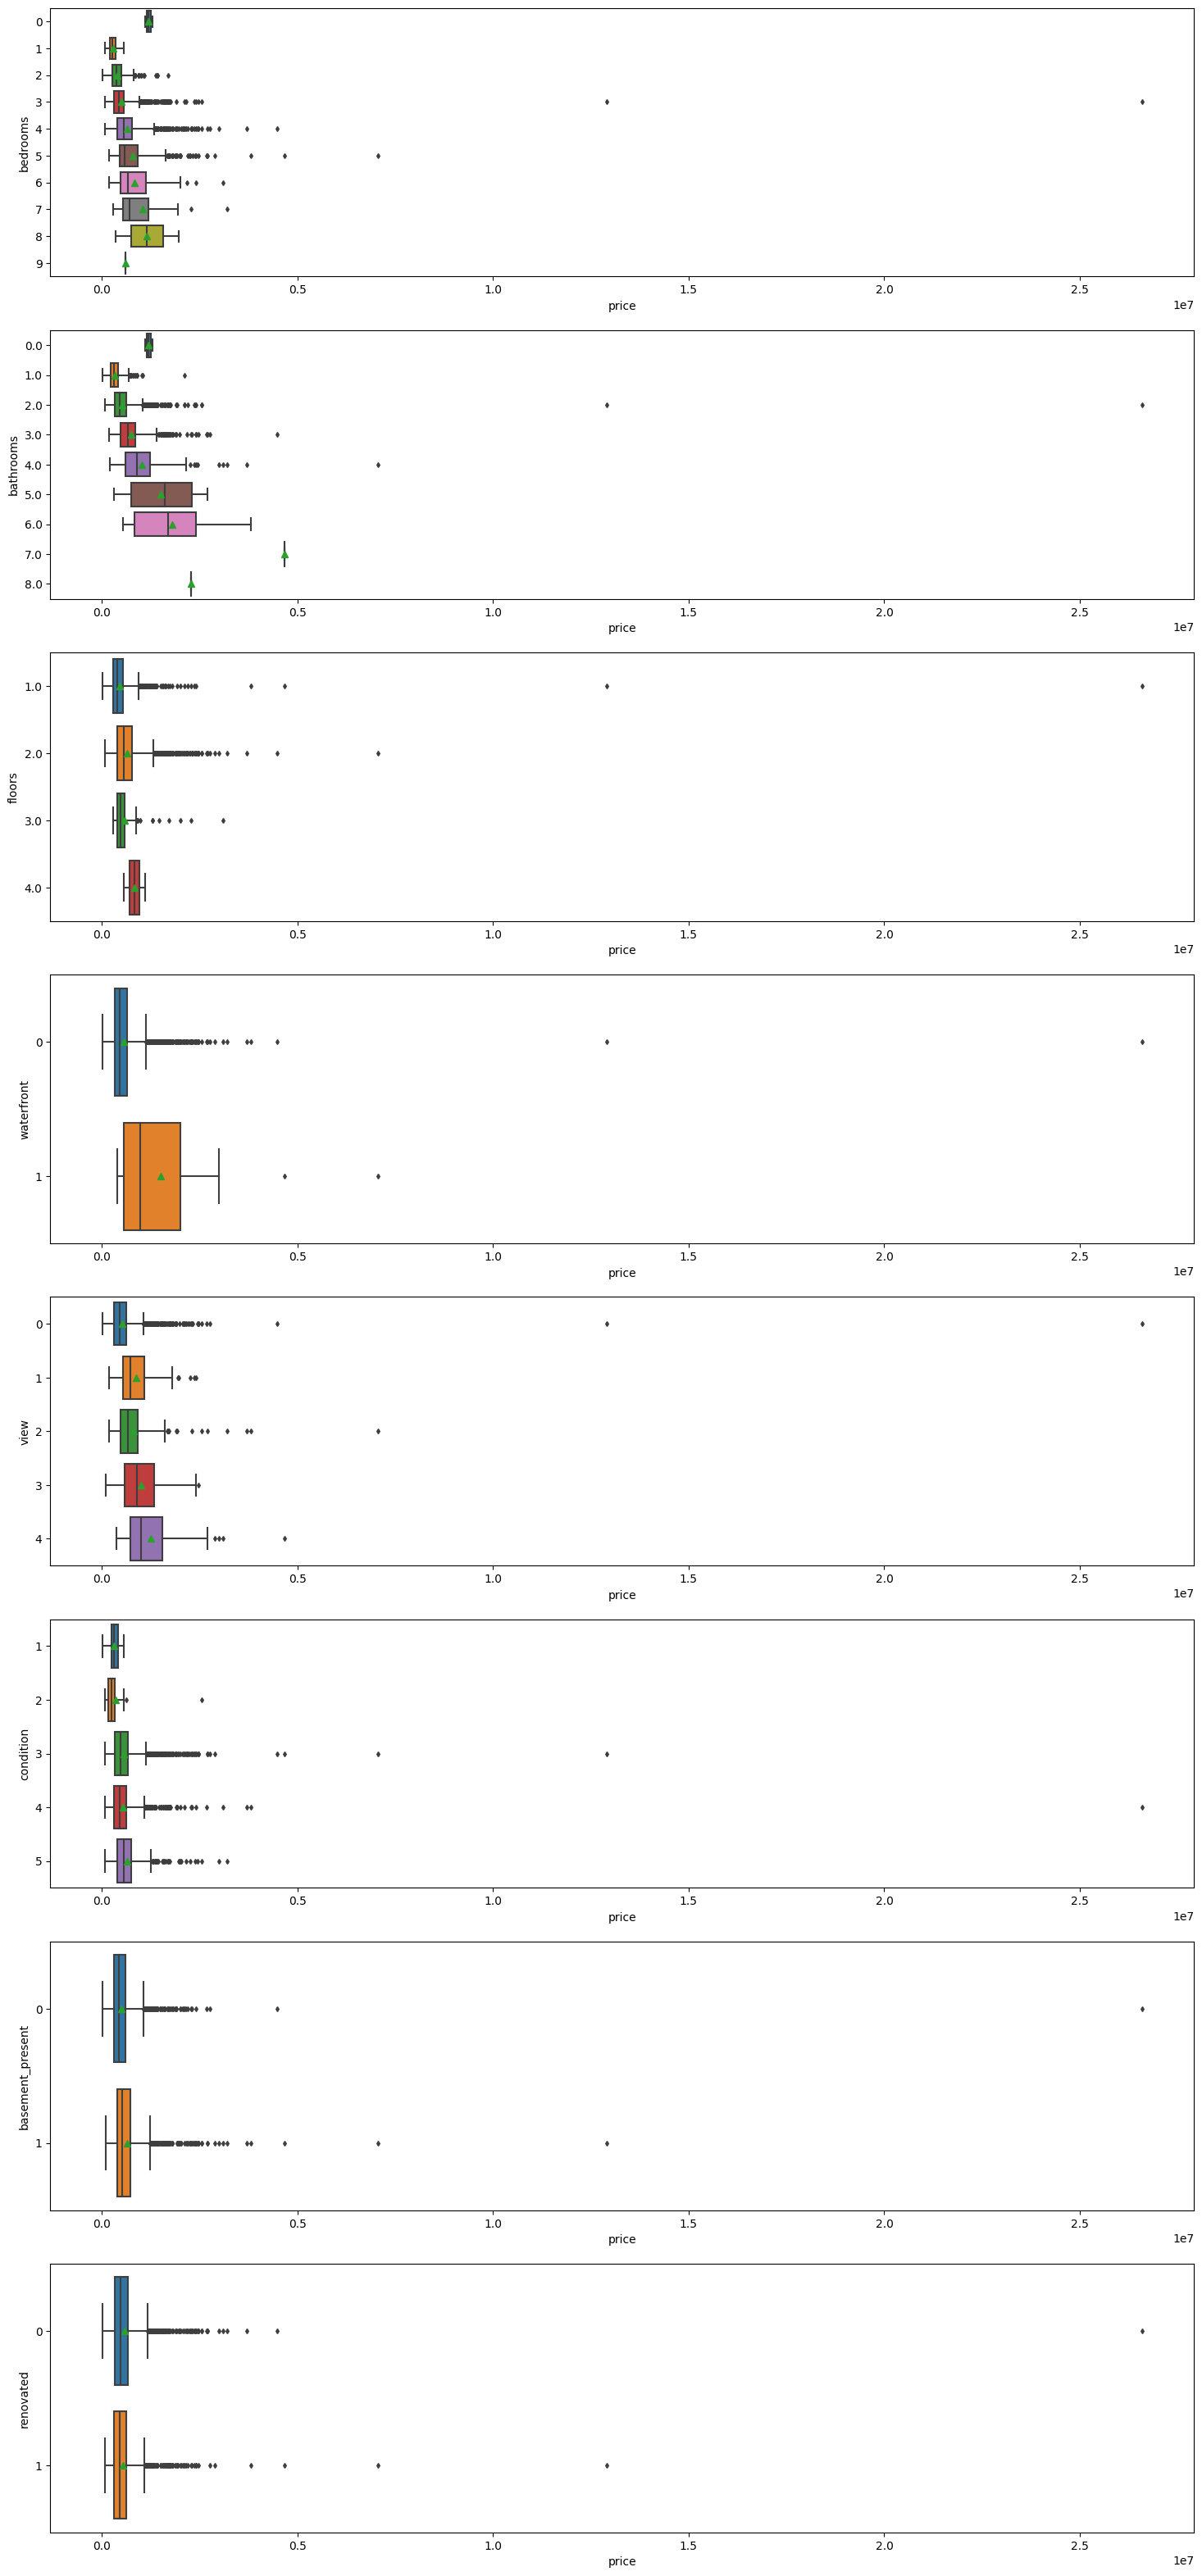

In [168]:
# we will show  the distribution of the categories of each ordianl variable using boxplots in relation to the price
fig, axarr = plt.subplots(8, figsize=(18,40))
sns.boxplot(y = 'bedrooms', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[0])
sns.boxplot(y = 'bathrooms', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[1])
sns.boxplot(y = 'floors', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[2])
sns.boxplot(y = 'waterfront', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[3])
sns.boxplot(y = 'view', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[4])
sns.boxplot(y = 'condition', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[5])
sns.boxplot(y = 'basement_present', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[6])
sns.boxplot(y = 'renovated', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[7])
plt.show()


** categorical data

In [169]:
df.dtypes

price                float64
bedrooms               int64
bathrooms            float64
sqft_living            int64
sqft_lot               int64
floors               float64
waterfront             int64
view                   int64
condition              int64
sqft_above             int64
sqft_basement          int64
yr_built               int64
yr_renovated           int64
street                object
city                  object
statezip              object
basement_present    category
renovated           category
dtype: object

We dispose of the 3 features of type object

In [170]:
# we will change the types of these features to make it easier to surmize them
df['street'] = df['street'].astype('category')
df['city'] = df['city'].astype('category')
df['statezip'] = df['statezip'].astype('category')

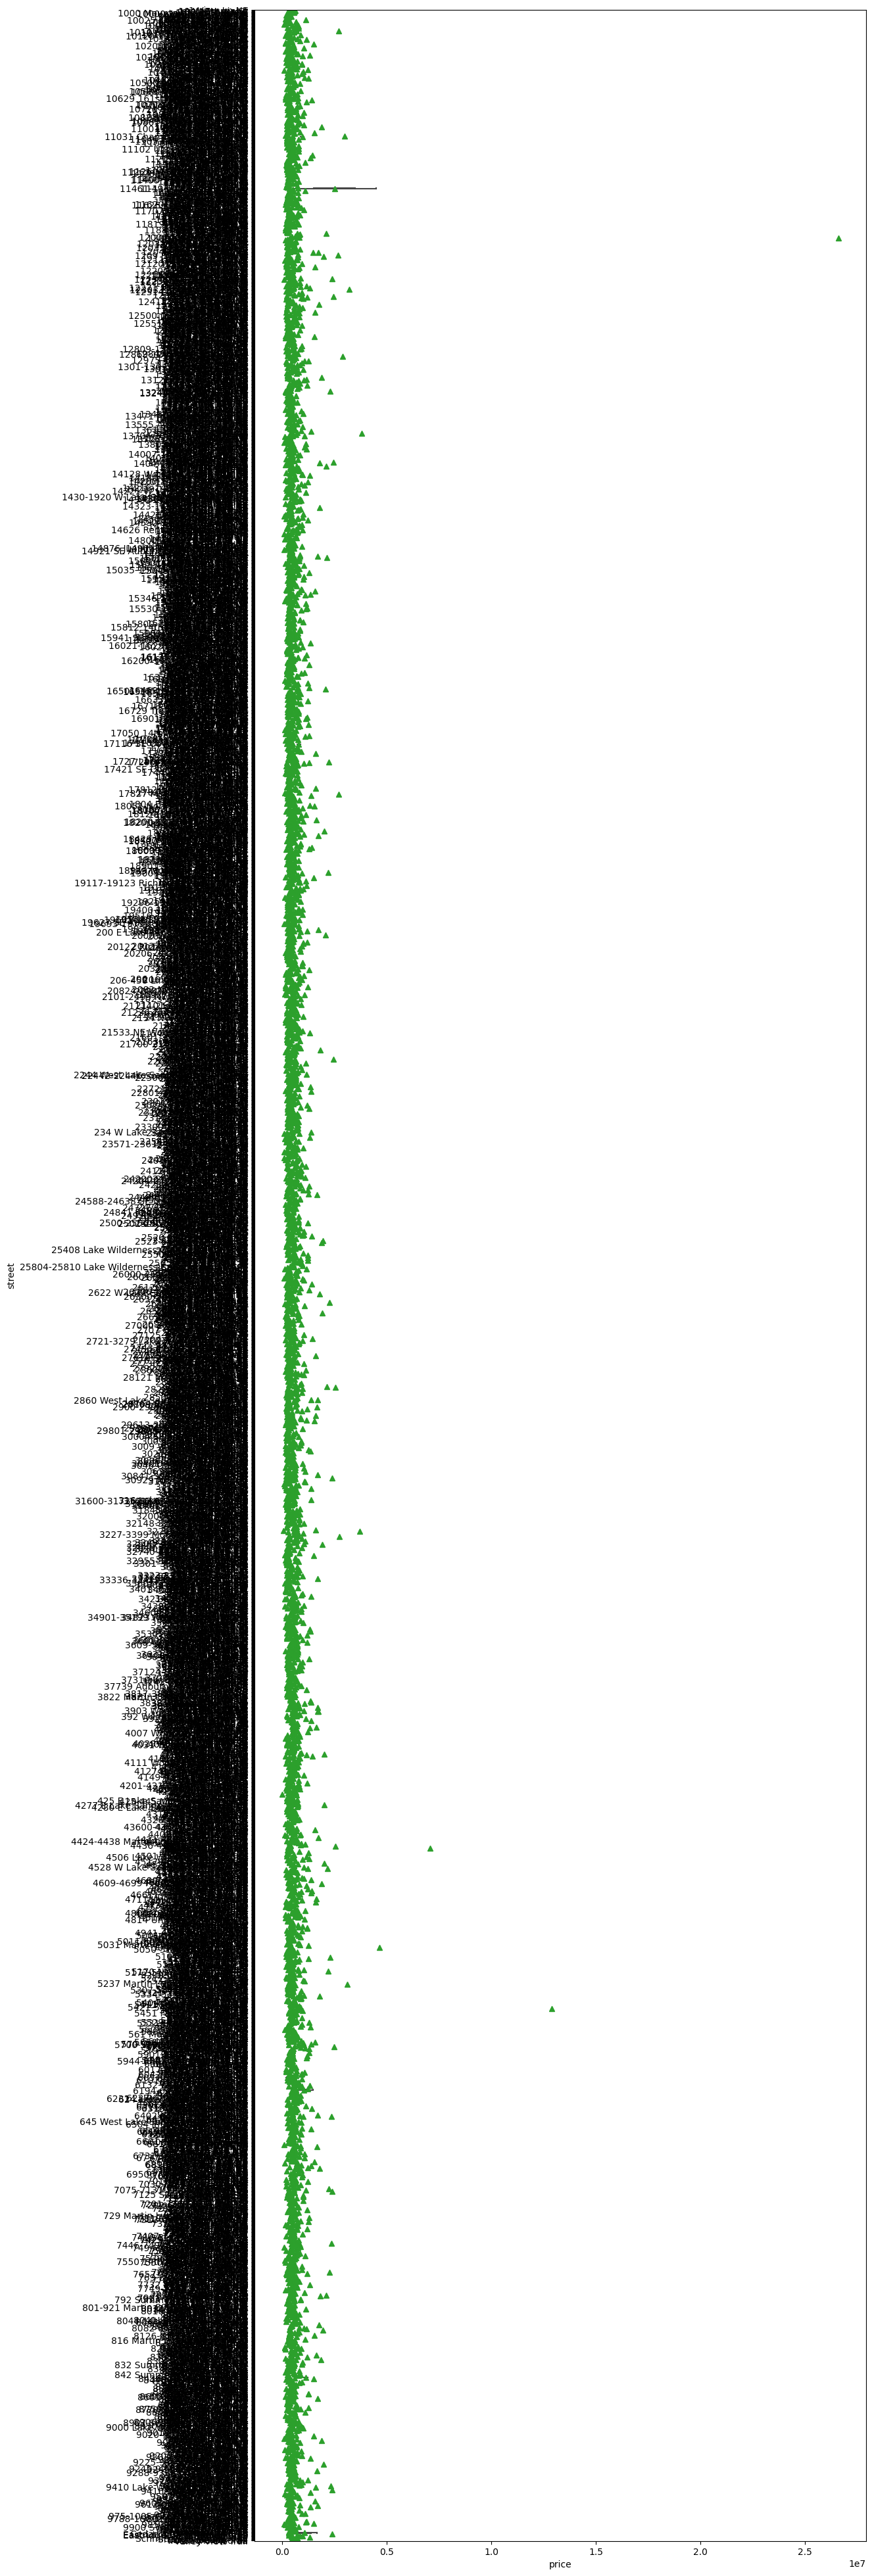

In [171]:
# Let's show boxplots of street 
fig, ax = plt.subplots(figsize=(12,50))
sns.boxplot(y = 'street', x = 'price', data = df, width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
plt.show()

From here we can detect that the street feature is completely chaotic and does not have much of an impact on the price as it does not have any visual correlation with it. 
It looks more like blobs leaning towads zero with occasionnaly one straying from that value, thus it can be dropped

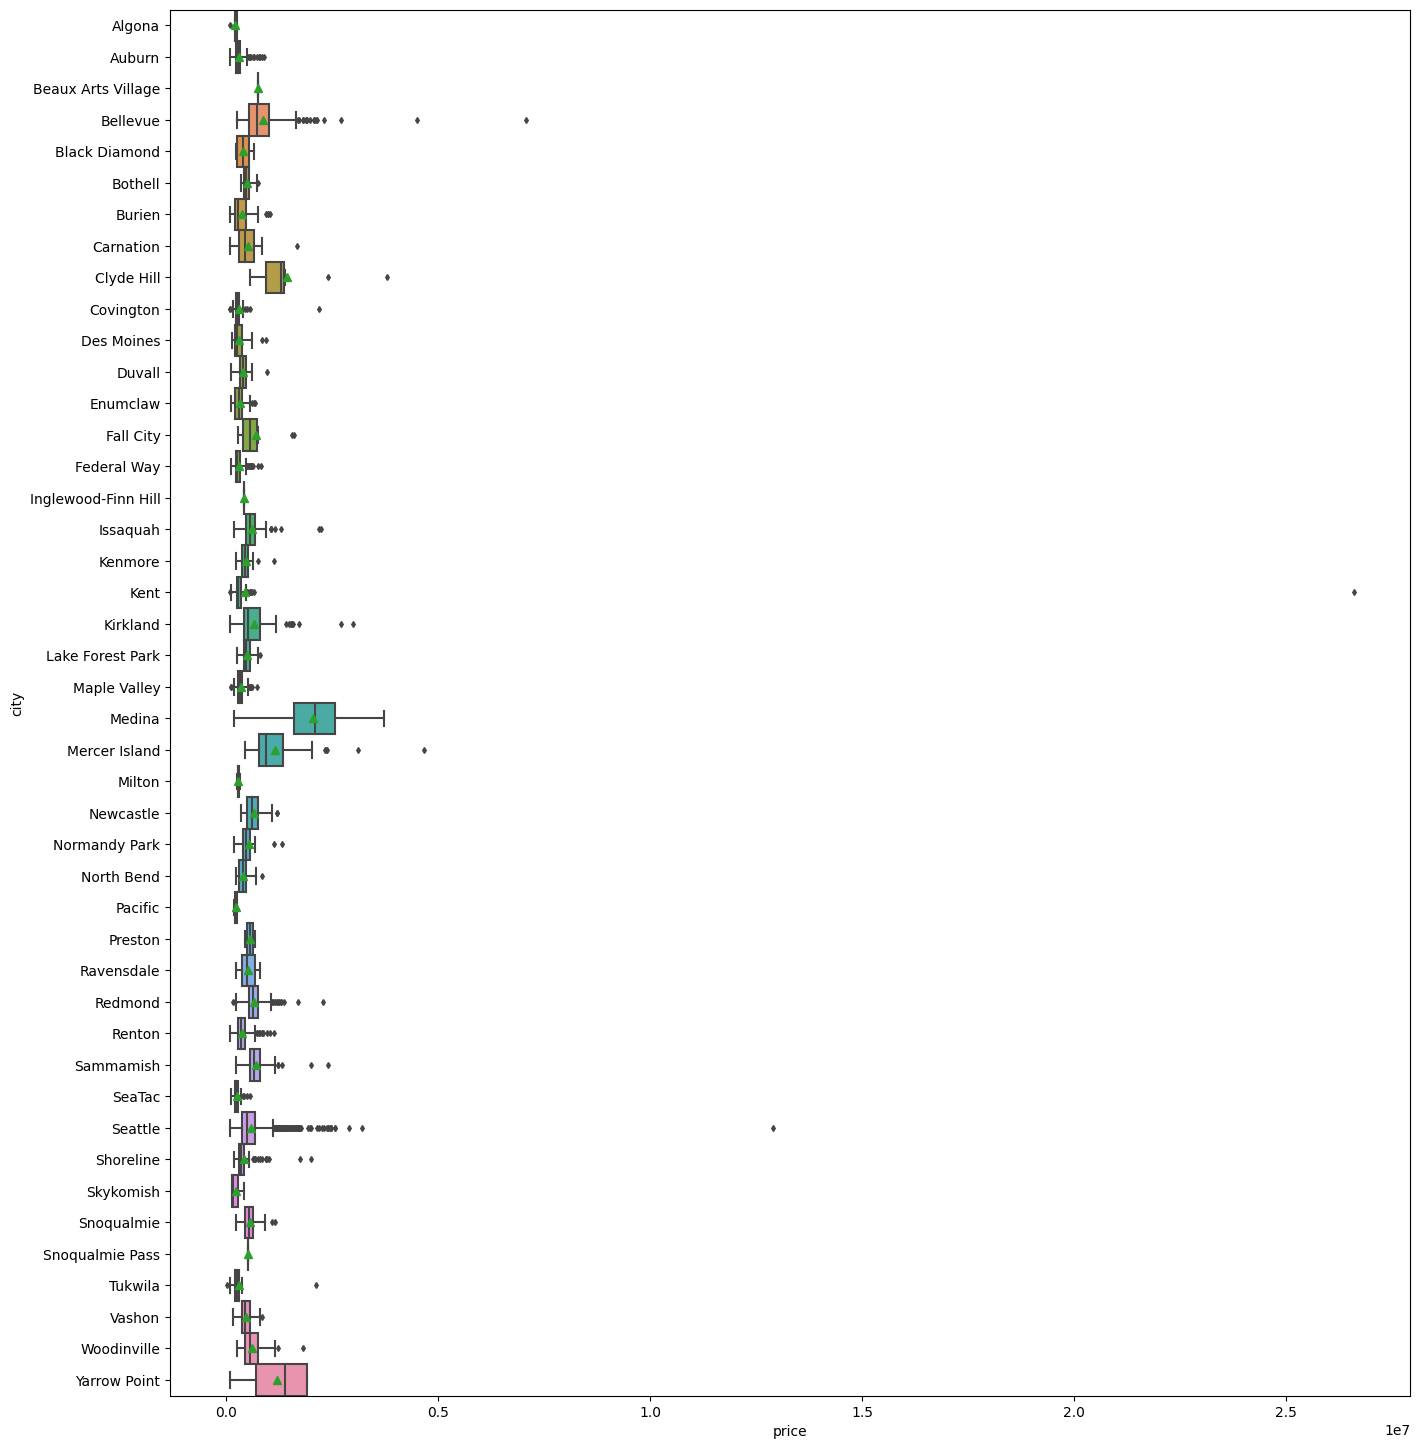

In [172]:
# Let's show boxplots first
fig, ax = plt.subplots(figsize=(16,18))
sns.boxplot(y = 'city', x = 'price', data = df, width = 1,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
plt.show()

# Calculate the correlation coefficient for city but only after factorizing the values
#r, p = stats.pointbiserialr(df['city'], df['price'])
#print ('point biserial correlation r is %s with p = %s' %(r,p))

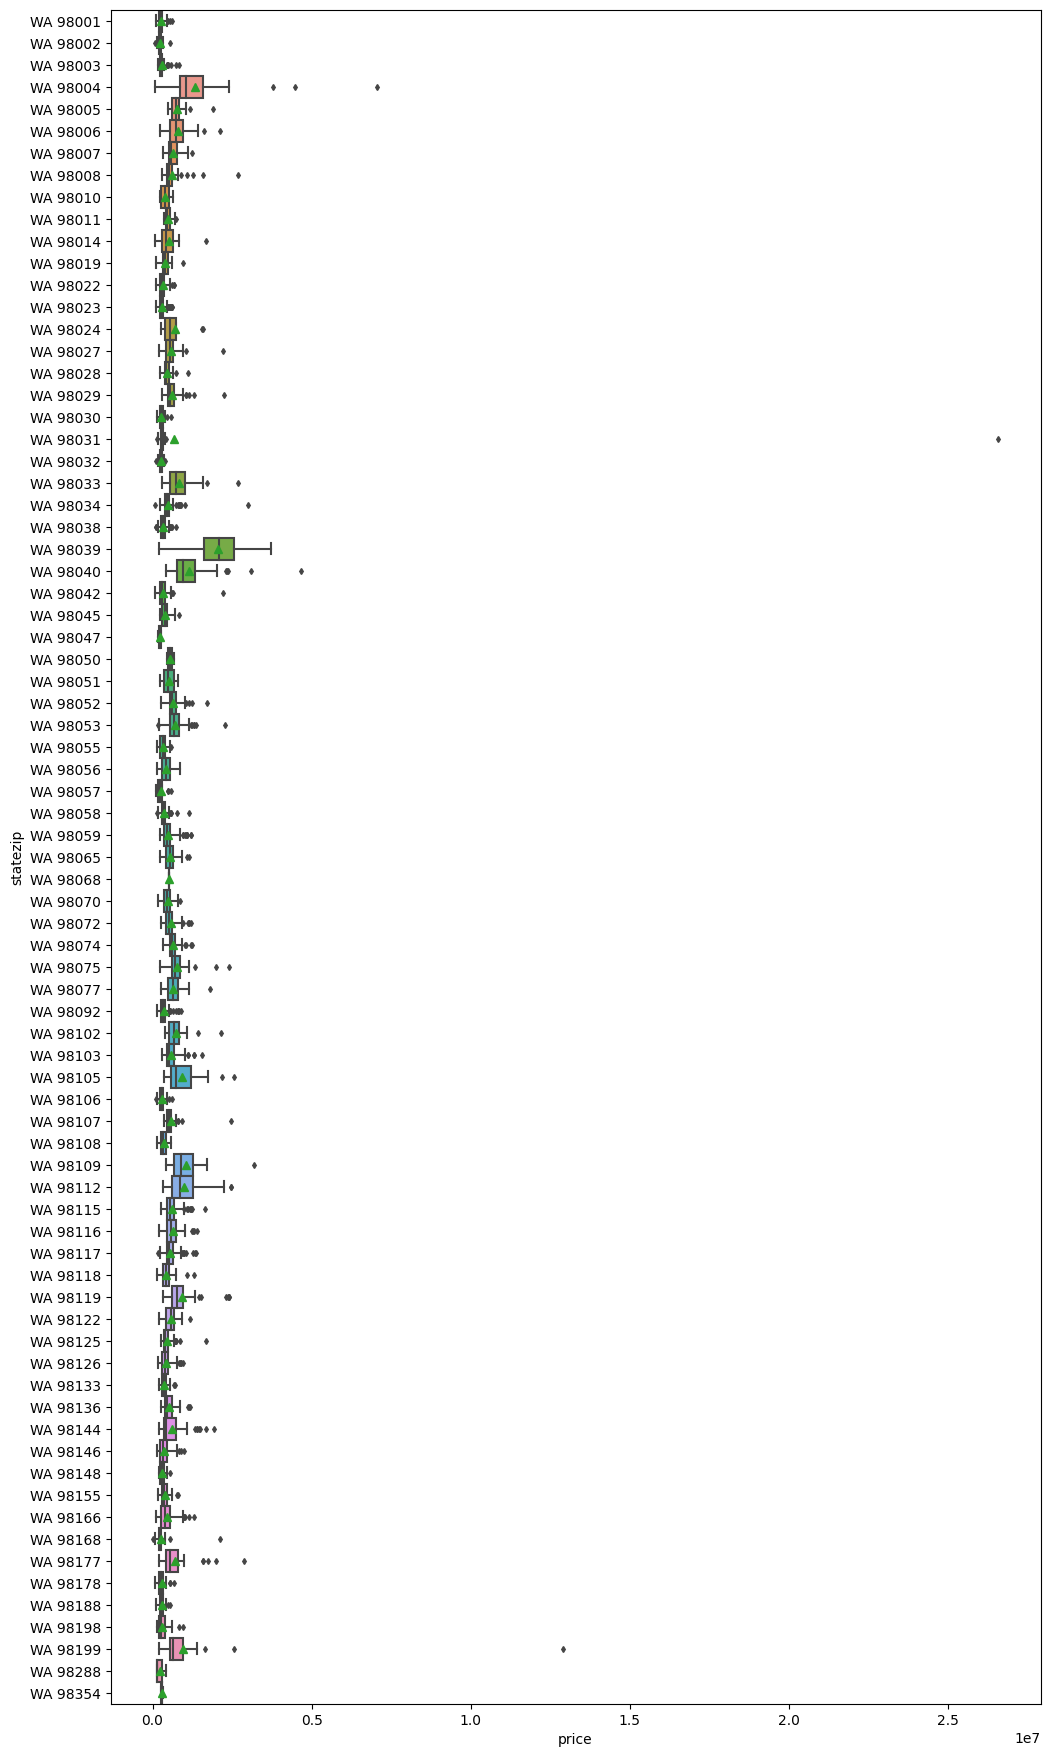

In [173]:
# Let's show boxplots first
fig, ax = plt.subplots(figsize=(12,22))
sns.boxplot(y = 'statezip', x = 'price', data = df, width = 1,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
plt.show()

# Calculate the correlation coefficient but only after factorizing the values of statezip
#r, p = stats.pointbiserialr(df['statezip'], df['price'])
#print ('point biserial correlation r is %s with p = %s' %(r,p))

We will take into account the city and state zip and check if they have any common factors

In [174]:
# we will start by changing the values of both features from categories to numerical
df['city'], _ = pd.factorize(df['city'])
df['statezip'], _ = pd.factorize(df['statezip'])

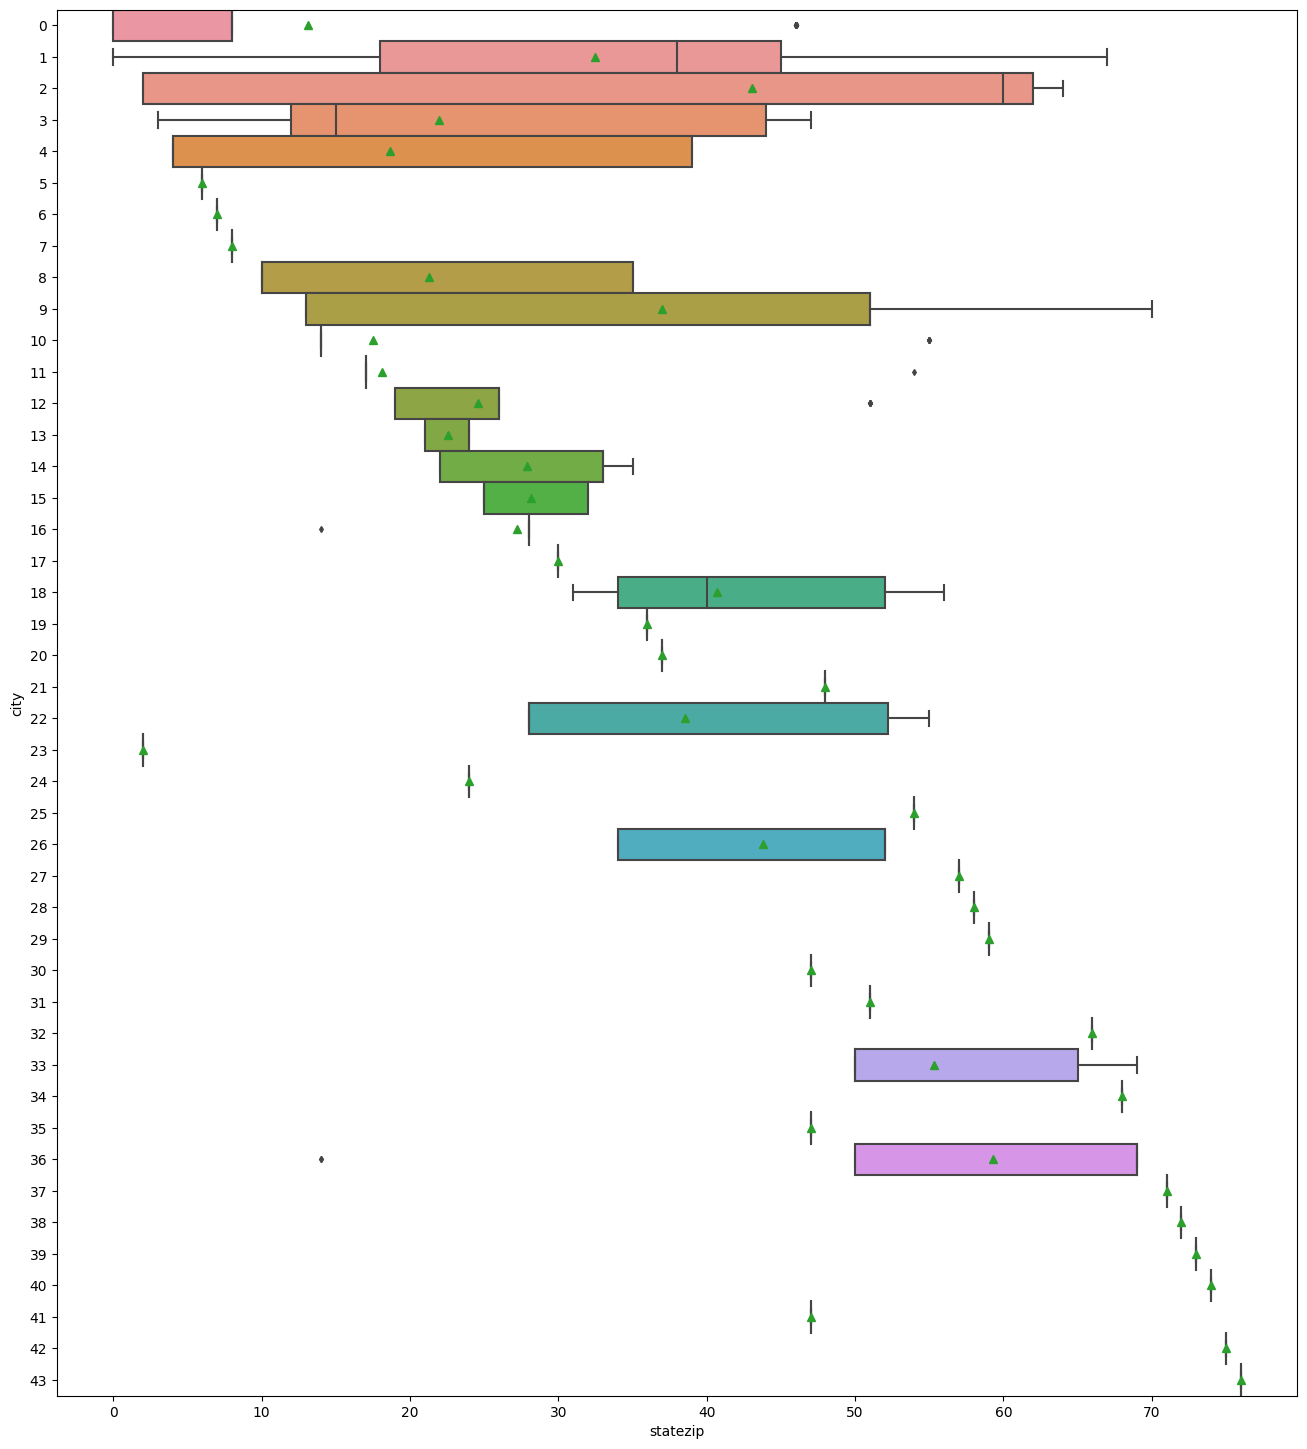

In [175]:
# Let's show the relationship between city and statezip with boxplots 
fig, ax = plt.subplots(figsize=(16,18))
sns.boxplot(y = 'city', x = 'statezip', data = df, width = 1,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
plt.show()


In [176]:
# we will create a series that used to count in how many cities the same statezip is found
count_series = df.groupby(['statezip','city']).size()
count_series

statezip  city
0         0       45
          1       48
1         1       49
2         2       57
          23      43
                  ..
72        38      28
73        39       1
74        40       6
75        42       2
76        43       2
Length: 103, dtype: int64

In [177]:
# let's visualize the correlation between statezip and city
data = df[['statezip','city']]
correlation = data.corr(method='pearson')
correlation

,statezip,city
statezip,1.000000,0.317995
city,0.317995,1.000000


In [178]:
# let's visualize the correlation between price and city
data = df[['city','price']]
correlation = data.corr(method='pearson')
correlation

,city,price
city,1.000000,-0.028977
price,-0.028977,1.000000


In [179]:
# let's visualize the correlation between statezip and price
data = df[['statezip','price']]
correlation = data.corr(method='pearson')
correlation

,statezip,price
statezip,1.000000,0.016523
price,0.016523,1.000000


- from the above information we can notice a negative correlation between city and price but almost none between price and statezip
- we can also notice that some values of state zip keep repeating on different cities
- this leads us to understand that the the impact of the city is in the number or houses existant in it and that the more houses there are the higher the price
- we can determine that the more houses are in a city the higher the price

So far we have treated all features but one, which is the yr_built, from the previous graphs we can detetct that the relationship between the price and the year built is more of a constant line with no acctual indication of a an impact of this variable on the price

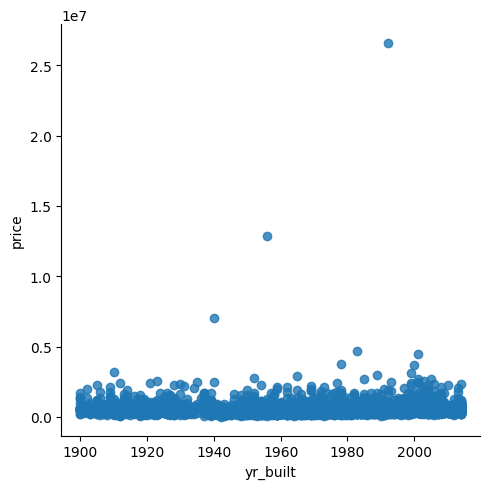

In [180]:
sns.lmplot(x='yr_built', y="price", data=df)

- to remediate to the situation
- what if we could determine how old the house acctually is, would it have an impact on the price.
- to do this we can create a new feature that would compute the age of the house based on the year of it was built and when the record was added(2014)

In [181]:
# create a new feature age that will calculate and append the value of the age of the house
df['age'] = df['yr_built'].apply(lambda x: 2014-x)

In [182]:
df['age']

0       59
1       93
2       48
3       51
4       38
        ..
4595    60
4596    31
4597     5
4598    40
4599    24
Name: age, Length: 4600, dtype: int64

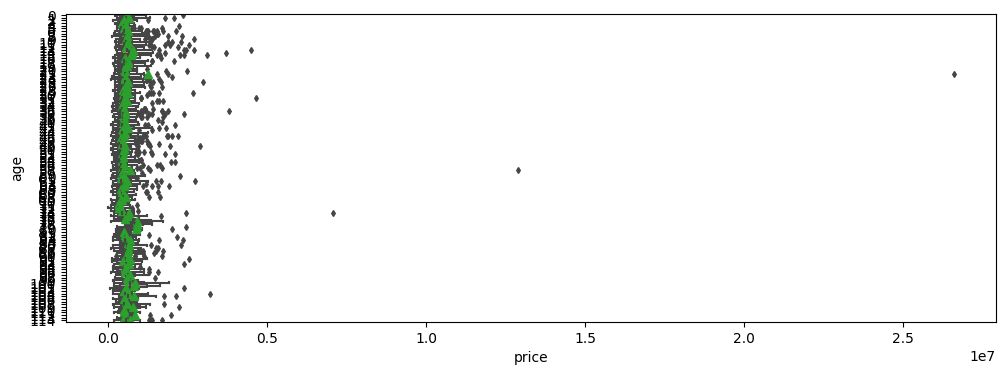

point biserial correlation r between price and age is -0.021661139867392026 with p = 0.14185908869341235


In [183]:
# age variable plotting
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'age', x = 'price', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = ax)
plt.show()
r, p = stats.pointbiserialr(df['age'], df['price'])
print ('point biserial correlation r between price and age is %s with p = %s' %(r,p))

We can see that it has negative correlation and thus we can detect an impact on our target variable

#### as we have been able to deal with all the features, lets go ahead and drop the ones that are not needed

In [184]:
df.drop(['sqft_lot', 'condition', 'street','sqft_basement','yr_renovated', 'waterfront', 'yr_built', 'statezip'], axis=1, inplace=True)

In [185]:
df

,price,bedrooms,bathrooms,sqft_living,floors,view,sqft_above,city,basement_present,renovated,age
0,3.130000e+05,3,2.0,1340,2.0,0,1340,0,0,1,59
1,2.384000e+06,5,2.0,3650,2.0,4,3370,1,1,0,93
2,3.420000e+05,3,2.0,1930,1.0,0,1930,2,0,0,48
3,4.200000e+05,3,2.0,2000,1.0,0,1000,3,1,0,51
4,5.500000e+05,4,2.0,1940,1.0,0,1140,4,1,1,38
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,2.0,1510,1.0,0,1510,1,0,1,60
4596,5.343333e+05,3,2.0,1460,2.0,0,1460,3,0,1,31
4597,4.169042e+05,3,2.0,3010,2.0,0,3010,18,0,0,5
4598,2.034000e+05,4,2.0,2090,1.0,0,1070,1,1,0,40


# Let's take care of the **outliers**

- with all the information above, and as most features are ordinal data at this time, it would be un-necessary to deal with outliers for them as that would create ambiguousness afterwards 
- As such, we will deal with outliers existing in the non ordinal numerical data

In [186]:
# we created a function to help compute the outliers into missing data
def replace_outliers_with_nan_iqr(df, feature, inplace=False):
    desired_feature = df[feature]
    
    q1, q3 = desired_feature.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    indices = (desired_feature[(desired_feature > upper_bound) | (desired_feature < lower_bound)]).index
    if not inplace:
        return desired_feature.replace(desired_feature[indices].values, np.nan)
    return desired_feature.replace(desired_feature[indices].values, np.nan, inplace=True)

In [187]:
# we determined the list of features to be handeled 
outliers_ = ['price','sqft_living','sqft_above']

In [188]:
# treated the outliers for the price
replace_outliers_with_nan_iqr(df, 'price', inplace=True)
df.price.isnull().sum()
df.price.fillna(value=df['price'].mean(), inplace=True)
df.isnull().sum().sum()

0

In [189]:
# treated the outliers for the sqft_living
replace_outliers_with_nan_iqr(df, 'sqft_living', inplace=True)
df.sqft_living.isnull().sum()
df.sqft_living.fillna(value=df['sqft_living'].mean(), inplace=True)
df.isnull().sum().sum()

0

In [190]:
# treated the outliers for the sqft_above
replace_outliers_with_nan_iqr(df, 'sqft_above', inplace=True)
df.sqft_above.isnull().sum()
df.sqft_above.fillna(value=df['sqft_above'].mean(), inplace=True)
df.isnull().sum().sum()

0

## Data scaling

In [191]:
# checked the data types
df.dtypes

price                float64
bedrooms               int64
bathrooms            float64
sqft_living          float64
floors               float64
view                   int64
sqft_above           float64
city                   int64
basement_present    category
renovated           category
age                    int64
dtype: object

In [192]:
# manipulated any variables that we not of type numerical
df['renovated'] = df['renovated'].astype(float).astype('int')
#df['city'] = df['city'].astype(float).astype('int')
df['basement_present'] = df['basement_present'].astype(float).astype('int')

To illustrate the impact  of scalability on the data, we first wanted to use the minmax scaler, which would scale all data values of the dataset with the [0,1] interval. However this scaler is quite sensitive to new dat information 
As such we chose to use the standard scaler to normalize the distribution

In [193]:
# started the data scaling with the standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)

In [194]:
scaled_data

array([[-0.84076597, -0.44112227, -0.12780529, ..., -0.82205482,
         1.21098635,  0.53101376],
       [ 0.        ,  1.75970468, -0.12780529, ...,  1.21646388,
        -0.82577314,  1.67469295],
       [-0.70054164, -0.44112227, -0.12780529, ..., -0.82205482,
        -0.82577314,  0.1609999 ],
       ...,
       [-0.3383559 , -0.44112227, -0.12780529, ..., -0.82205482,
        -0.82577314, -1.2854179 ],
       [-1.37071722,  0.6592912 , -0.12780529, ...,  1.21646388,
        -0.82577314, -0.10810108],
       [-1.28754969, -0.44112227, -0.12780529, ..., -0.82205482,
        -0.82577314, -0.64630305]])

In [195]:
# turning the scaled data into a dataframe once again
x_cols = ['price','bedrooms',	'bathrooms',	'sqft_living',	'floors',	'view',	'sqft_above',	'city',	'basement_present',	'renovated',  'age']
df_cleaned = pd.DataFrame(scaled_data, columns = x_cols)

In [196]:
df_cleaned

,price,bedrooms,bathrooms,sqft_living,floors,view,sqft_above,city,basement_present,renovated,age
0,-0.840766,-0.441122,-0.127805,-0.911670,0.803648,-0.309194,-0.574612,-0.932857,-0.822055,1.210986,0.531014
1,0.000000,1.759705,-0.127805,2.055128,0.803648,4.830079,2.238315,-0.823706,1.216464,-0.825773,1.674693
2,-0.700542,-0.441122,-0.127805,-0.153916,-1.006725,-0.309194,0.242938,-0.714556,-0.822055,-0.825773,0.161000
3,-0.323387,-0.441122,-0.127805,-0.064013,-1.006725,-0.309194,-1.045743,-0.605405,1.216464,-0.825773,0.261913
4,0.305205,0.659291,-0.127805,-0.141073,-1.006725,-0.309194,-0.851748,-0.496255,1.216464,1.210986,-0.175376
...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.864137,-0.441122,-0.127805,-0.693334,-1.006725,-0.309194,-0.339047,-0.823706,-0.822055,1.210986,0.564651
4596,0.229452,-0.441122,-0.127805,-0.757551,0.803648,-0.309194,-0.408331,-0.605405,-0.822055,1.210986,-0.410840
4597,-0.338356,-0.441122,-0.127805,1.233158,0.803648,-0.309194,1.739471,1.031852,-0.822055,-0.825773,-1.285418
4598,-1.370717,0.659291,-0.127805,0.051576,-1.006725,-0.309194,-0.948745,-0.823706,1.216464,-0.825773,-0.108101


## Modeling to show our work

we chose to use the linear regression model and XGB model to test if our dataset is ready to be tested

In [220]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

X = df_cleaned.iloc[:, 1:]
y = df_cleaned.iloc[:, 0]

# splitting the data into tran and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=132)

In [241]:
# building the model and fitting the training data
model = xgb.XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=500, random_state= 420, base_score=0.7, subsample=0.6, scale_pos_weight=4)
model.fit(X_train, y_train)
# prediction
y_pred = model.predict(X_test) #output from XGBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error
r_score= r2_score(y_test,y_pred)
mse_score= mean_squared_error(y_test,y_pred)
print("Scores with XGBoost ",r_score, mse_score)

Scores with XGBoost  0.6066592793660721 0.4135710691061989


# The result are not too promising but not too bad, this lab was created to mainly worm on data prep and feature engineering for future work we will make the modeling our objective